<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/lung/lung_chromatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Human Lung Cancer Cell lines using Chromatin Profiling**

## **Introduction**

Lung cancer, a complex disease, is broadly categorized into two main types: small cell lung cancer (SCLC) and non-small cell lung cancer (NSCLC).

SCLC typically originates in the bronchi, rapidly proliferating and swiftly spreading to areas like the lymph nodes. Accounting for less than 20% of lung cancer cases, SCLC is strongly associated with tobacco smoking. SCLC is highly aggressive and frequently metastasizes, and as such, only about a quarter of patients achieve remission.

NSCLC comprises 80-90% of lung cancer diagnoses and tends to progress more gradually. Often asymptomatic initially, NSCLC develops slowly, leading to delayed detection; approximately 75% of cases are diagnosed at advanced stages. Surgery is a viable option for early-stage patients, while those in later stages typically undergo chemotherapy and radiation therapy.

In this study, I use cell line data (miRNA expression) from the Depmap Portal (depmap.org) to compare the profiles of SCLC and NSCLC. This set comprise 119 NSCLC and 49 SCLC cell lines, with a total of 743 features. I demonstrate the robust classification ability of these features, achieving an f1 score as 0.94 and 0.84 for Non-Small Cell Lung Cancer and Small Cell Lung Cancer, respectively. Moreover, there is distinct expression profiles of numerous miRNAs across these cell lines, shedding light on potential molecular mechanisms underlying lung cancer subtypes.

This work identifies distinct miRNA profiles in SCLC and NSCLC, which may play important roles in the mechanisms of these diseases.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

## **Load Data and Preprocess Data**

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import fileinput
filePath ="/content/gdrive/MyDrive/lung/lung_chromatin.csv"

In [4]:
import pandas as pd
data = pd.read_csv(filePath)

In [5]:
data.head(3)

,depmap_id,cell_line_display_name,lineage_1,lineage_2,lineage_3,lineage_5,lineage_6,lineage_4,H3K4me0,H3K4me1,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,ACH-000382,CORL24,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.256026,0.564636,...,-1.712248,-1.097775,-1.392350,-2.394747,-0.419889,-0.001917,0.388115,-0.090630,0.564439,1.162157
1,ACH-000187,CORL311,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.319412,0.427264,...,0.996379,1.502162,0.794084,0.884487,0.592411,-0.107763,0.165048,0.283863,0.100700,0.417915
2,ACH-000695,CORL47,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.151644,0.068741,...,0.702651,2.028062,1.732212,0.596686,-0.532791,0.060770,-0.601200,0.032399,-0.084822,-0.477969


In [6]:
data['lineage'] = np.where(data['lineage_2'].str.contains('Non-small', case=False), 'Non-Small Cell', 'Small Cell')

In [7]:
data['lineage'].value_counts()

lineage
Non-Small Cell    112
Small Cell         48
Name: count, dtype: int64

In [8]:
columns_to_remove = ['depmap_id', 'cell_line_display_name', 'lineage_1', 'lineage_2', 'lineage_3', 'lineage_5', 'lineage_6', 'lineage_4']
data = data.drop(columns=columns_to_remove)

In [9]:
data.head(2)

,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,H3K9me0K14ac1,...,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2,lineage
0,0.256026,0.564636,0.448906,0.096119,0.921273,-0.443184,-1.107441,0.130764,0.61093,1.210030,...,-1.097775,-1.392350,-2.394747,-0.419889,-0.001917,0.388115,-0.090630,0.564439,1.162157,Small Cell
1,0.319412,0.427264,-0.221406,0.536809,-0.309614,-0.236500,-0.157305,-1.200022,1.06126,0.665113,...,1.502162,0.794084,0.884487,0.592411,-0.107763,0.165048,0.283863,0.100700,0.417915,Small Cell


In [14]:
data.isnull().sum(axis=0)


H3K4me0              0
H3K4me1              0
H3K4me2              0
H3K4ac1             16
H3K9me0K14ac0        0
H3K9me1K14ac0        0
H3K9me2K14ac0        1
H3K9me3K14ac0        1
H3K9ac1K14ac0        1
H3K9me0K14ac1        0
H3K9me1K14ac1        0
H3K9me2K14ac1        1
H3K9me3K14ac1        0
H3K9ac1K14ac1        0
H3K18ac0K23ac0       0
H3K18ac1K23ac0       0
H3K18ac0K23ac1       0
H3K18ac1K23ac1       0
H3K18ac0K23ub1      80
H3K27me0K36me0       0
H3K27me0K36me1       1
H3K27me0K36me2       1
H3K27me0K36me3       1
H3K27me1K36me0       1
H3K27me1K36me1       1
H3K27me1K36me2       0
H3K27me1K36me3       0
H3K27me2K36me0       1
H3K27me2K36me1       1
H3K27me2K36me2       0
H3K27me3K36me0       1
H3K27me3K36me1       1
H3K27ac1K36me0       4
H3K27ac1K36me1       5
H3K27ac1K36me2       4
H3K27ac1K36me3       2
H3.3K27me0K36me0     1
H3K56me0             0
H3K56me1            78
H3K79me0             0
H3K79me1             3
H3K79me2             2
lineage              0
dtype: int6

In [18]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
for column, percentage in zip(data.columns, missing_values_percentage):
  if percentage > 0:
    print(f"Column: {column},   % missing val: {percentage:.2f}%")


Column: H3K4ac1,   % missing val: 10.00%
Column: H3K9me2K14ac0,   % missing val: 0.62%
Column: H3K9me3K14ac0,   % missing val: 0.62%
Column: H3K9ac1K14ac0,   % missing val: 0.62%
Column: H3K9me2K14ac1,   % missing val: 0.62%
Column: H3K27me0K36me1,   % missing val: 0.62%
Column: H3K27me0K36me2,   % missing val: 0.62%
Column: H3K27me0K36me3,   % missing val: 0.62%
Column: H3K27me1K36me0,   % missing val: 0.62%
Column: H3K27me1K36me1,   % missing val: 0.62%
Column: H3K27me2K36me0,   % missing val: 0.62%
Column: H3K27me2K36me1,   % missing val: 0.62%
Column: H3K27me3K36me0,   % missing val: 0.62%
Column: H3K27me3K36me1,   % missing val: 0.62%
Column: H3K27ac1K36me0,   % missing val: 2.50%
Column: H3K27ac1K36me1,   % missing val: 3.12%
Column: H3K27ac1K36me2,   % missing val: 2.50%
Column: H3K27ac1K36me3,   % missing val: 1.25%
Column: H3.3K27me0K36me0,   % missing val: 0.62%
Column: H3K79me1,   % missing val: 1.88%
Column: H3K79me2,   % missing val: 1.25%


In [17]:
data.drop(columns=['H3K18ac0K23ub1', 'H3K56me1'], inplace=True)


In [19]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
for column, percentage in zip(data.columns, missing_values_percentage):
  if percentage > 0:
    print(f"Column: {column},   % missing val: {percentage:.2f}%")

Column: H3K4ac1,   % missing val: 10.00%
Column: H3K9me2K14ac0,   % missing val: 0.62%
Column: H3K9me3K14ac0,   % missing val: 0.62%
Column: H3K9ac1K14ac0,   % missing val: 0.62%
Column: H3K9me2K14ac1,   % missing val: 0.62%
Column: H3K27me0K36me1,   % missing val: 0.62%
Column: H3K27me0K36me2,   % missing val: 0.62%
Column: H3K27me0K36me3,   % missing val: 0.62%
Column: H3K27me1K36me0,   % missing val: 0.62%
Column: H3K27me1K36me1,   % missing val: 0.62%
Column: H3K27me2K36me0,   % missing val: 0.62%
Column: H3K27me2K36me1,   % missing val: 0.62%
Column: H3K27me3K36me0,   % missing val: 0.62%
Column: H3K27me3K36me1,   % missing val: 0.62%
Column: H3K27ac1K36me0,   % missing val: 2.50%
Column: H3K27ac1K36me1,   % missing val: 3.12%
Column: H3K27ac1K36me2,   % missing val: 2.50%
Column: H3K27ac1K36me3,   % missing val: 1.25%
Column: H3.3K27me0K36me0,   % missing val: 0.62%
Column: H3K79me1,   % missing val: 1.88%
Column: H3K79me2,   % missing val: 1.25%


In [21]:
# fill in missing val with the average of each column
for column in data.columns:
  if data[column].isnull().any():
    data[column] = data[column].fillna(np.nanmean(data[column]))


In [22]:
data.isnull().sum(axis=0)

H3K4me0             0
H3K4me1             0
H3K4me2             0
H3K4ac1             0
H3K9me0K14ac0       0
H3K9me1K14ac0       0
H3K9me2K14ac0       0
H3K9me3K14ac0       0
H3K9ac1K14ac0       0
H3K9me0K14ac1       0
H3K9me1K14ac1       0
H3K9me2K14ac1       0
H3K9me3K14ac1       0
H3K9ac1K14ac1       0
H3K18ac0K23ac0      0
H3K18ac1K23ac0      0
H3K18ac0K23ac1      0
H3K18ac1K23ac1      0
H3K27me0K36me0      0
H3K27me0K36me1      0
H3K27me0K36me2      0
H3K27me0K36me3      0
H3K27me1K36me0      0
H3K27me1K36me1      0
H3K27me1K36me2      0
H3K27me1K36me3      0
H3K27me2K36me0      0
H3K27me2K36me1      0
H3K27me2K36me2      0
H3K27me3K36me0      0
H3K27me3K36me1      0
H3K27ac1K36me0      0
H3K27ac1K36me1      0
H3K27ac1K36me2      0
H3K27ac1K36me3      0
H3.3K27me0K36me0    0
H3K56me0            0
H3K79me0            0
H3K79me1            0
H3K79me2            0
lineage             0
dtype: int64

In [23]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [24]:
X.shape

(160, 40)

## **Clustering by KMeans**

To assess if the current features are sufficient allow the segregation of cluster same type of cells together, I perform cluster analysis using KMeans. I expect there will be two clusters: Non-Small Cell Cancer cells and Small Cell Cancer cells.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

inertias_1 = []
silhouette_avgs = []
max_K = 5
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

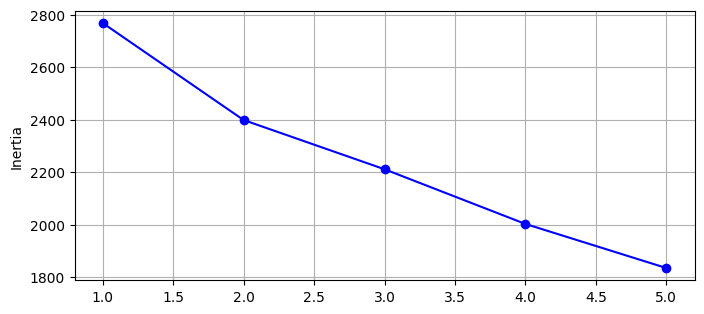

In [26]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 6), inertias_1, "bo-")
plt.xlabel("")
plt.ylabel("Inertia")
plt.grid()
plt.show()

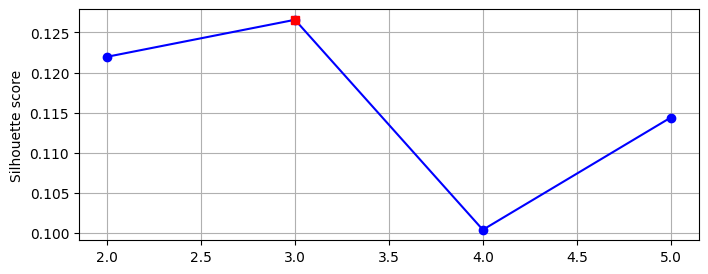

In [27]:
plt.figure(figsize=(8, 3))

k_range = range(2, 6)
best_index = np.argmax(silhouette_avgs)
best_k = k_range[best_index]
best_score = silhouette_avgs[best_index]

plt.plot(k_range, silhouette_avgs, "bo-")
plt.xlabel("")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

Although there the optimial seems to be 3 clusters using these data, the Silhouette Score for 2 clusters and 2 clusters are very similar. I will proceed to cluster with two clusters.

In [28]:
# using 2 clusters using all of the data
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
cluster_labels = kmeans.labels_

# Initialize dictionaries to store indices of data points belonging to each cluster
cluster_indices = {}
for i in range(2):  # Assuming 2 clusters
    cluster_indices[i] = []

for i, label in enumerate(cluster_labels):
    cluster_indices[label].append(y[i])


In [30]:
from collections import Counter

for key, value in cluster_indices.items():
    freq = Counter(value)
    print(key, ':', freq)


0 : Counter({'Non-Small Cell': 71, 'Small Cell': 17})
1 : Counter({'Non-Small Cell': 41, 'Small Cell': 31})


In [31]:
# using PCA to visualize the two clusters

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
labels = kmeans.labels_

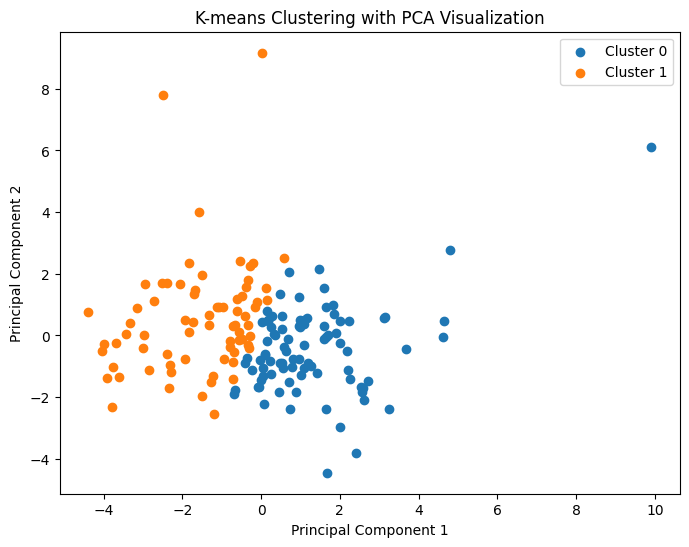

In [54]:

plt.figure(figsize=(8, 6))
x_range = (-2, 12)
y_range = (-2, 12)

for cluster_label in np.unique(labels):
    plt.scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

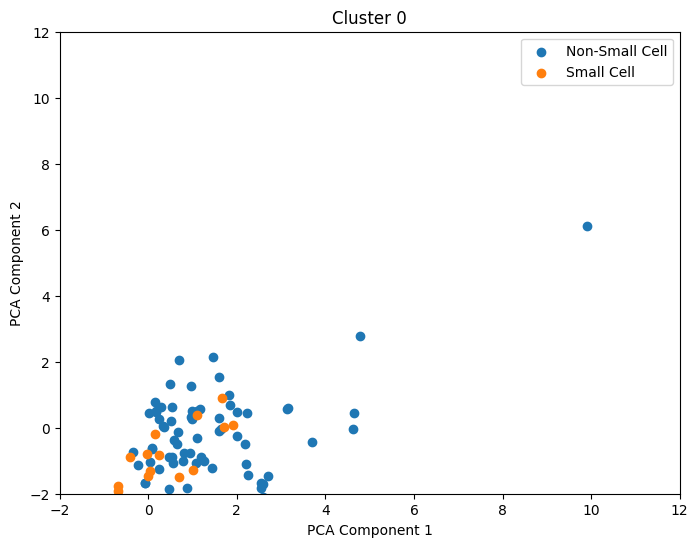

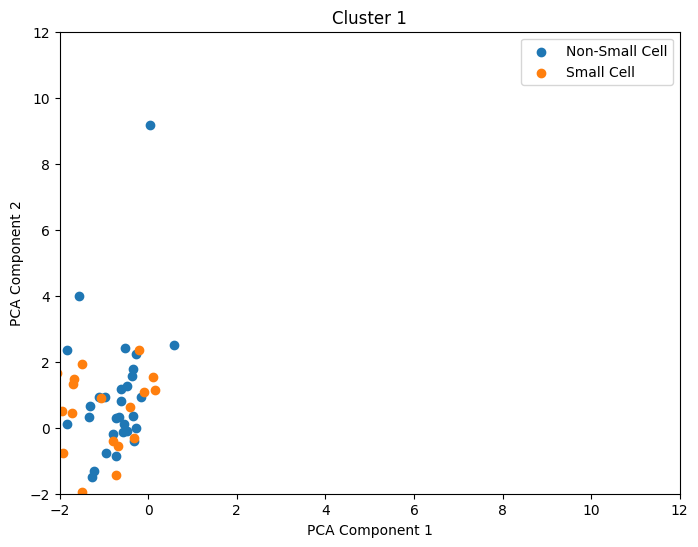

In [55]:
x_range = (-2, 12)
y_range = (-2, 12)

unique_labels = np.unique(kmeans.labels_)

for label in unique_labels:
    plt.figure(figsize=(8, 6))
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Cluster {label}')

    indices = np.where(kmeans.labels_ == label)

    for class_label in np.unique(data['lineage']):
        class_indices = np.where(data['lineage'].values[indices] == class_label)
        plt.scatter(X_pca[indices][class_indices, 0], X_pca[indices][class_indices, 1], label=f'{class_label}')
        print()

    plt.legend()
    plt.show()


Conclusion: Using KMean Clustering, there are optimually 2 - 3 clusters as assess by the Silhouette Score, with one cluster having a mixture of Small Cell and Non-Small Lung Cancer. Cluster 0 is predominantly Non-Small Cells, cluster 1 is a mixture of Non-Small Cell and Small Cell Lung Cancer.

## **Classification**

I will use three difference approaches to try to classify Lung Cancer Cells with the aforementioned features. I will compare performance of Logistic Regression, SVC, and RandomForest Classifier. For each approach, I will determine the optimal parameters by grid_search.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   H3K4me0           160 non-null    float64
 1   H3K4me1           160 non-null    float64
 2   H3K4me2           160 non-null    float64
 3   H3K4ac1           160 non-null    float64
 4   H3K9me0K14ac0     160 non-null    float64
 5   H3K9me1K14ac0     160 non-null    float64
 6   H3K9me2K14ac0     160 non-null    float64
 7   H3K9me3K14ac0     160 non-null    float64
 8   H3K9ac1K14ac0     160 non-null    float64
 9   H3K9me0K14ac1     160 non-null    float64
 10  H3K9me1K14ac1     160 non-null    float64
 11  H3K9me2K14ac1     160 non-null    float64
 12  H3K9me3K14ac1     160 non-null    float64
 13  H3K9ac1K14ac1     160 non-null    float64
 14  H3K18ac0K23ac0    160 non-null    float64
 15  H3K18ac1K23ac0    160 non-null    float64
 16  H3K18ac0K23ac1    160 non-null    float64
 1

In [57]:
# Check if any cell contains NaN
any_nan = data.isna().any().any()
any_nan

False

In [58]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.utils.class_weight import compute_class_weight

cv = 5

## **Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

log_reg = LogisticRegression(class_weight=dict(zip(np.unique(y_train), class_weights)), max_iter=5000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.05, 0.1],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={'Non-Small Cell': 0.7111111111111111,
                                                        'Small Cell': 1.6842105263157894},
                                          max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [63]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
log_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(log_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'saga'}
Mean Cross-Validation Score: 0.759076923076923


In [64]:
y_pred = log_best_model.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  2],
       [ 3,  7]])

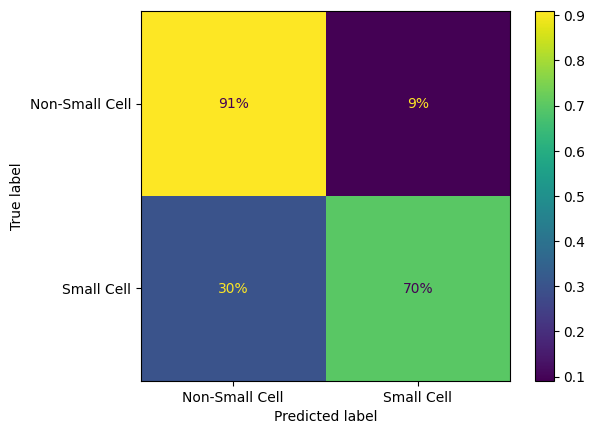

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.87      0.91      0.89        22
    Small Cell       0.78      0.70      0.74        10

      accuracy                           0.84        32
     macro avg       0.82      0.80      0.81        32
  weighted avg       0.84      0.84      0.84        32



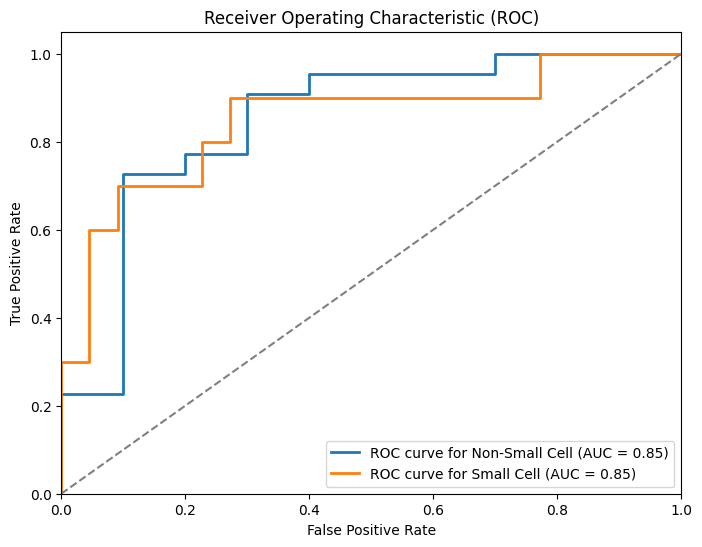

In [68]:
from sklearn.metrics import roc_curve, auc

## auc
y_prob = log_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **SVC**

In [69]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced', probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [70]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

svc_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(svc_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01}
Mean Cross-Validation Score: 0.7584615384615384


In [71]:
y_pred = svc_best_model.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  3],
       [ 5,  5]])

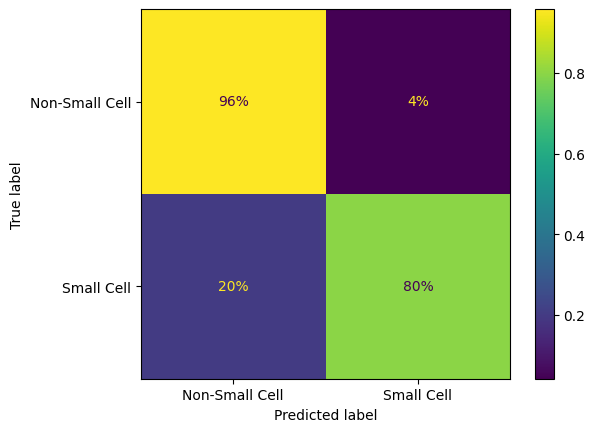

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [73]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.79      0.86      0.83        22
    Small Cell       0.62      0.50      0.56        10

      accuracy                           0.75        32
     macro avg       0.71      0.68      0.69        32
  weighted avg       0.74      0.75      0.74        32



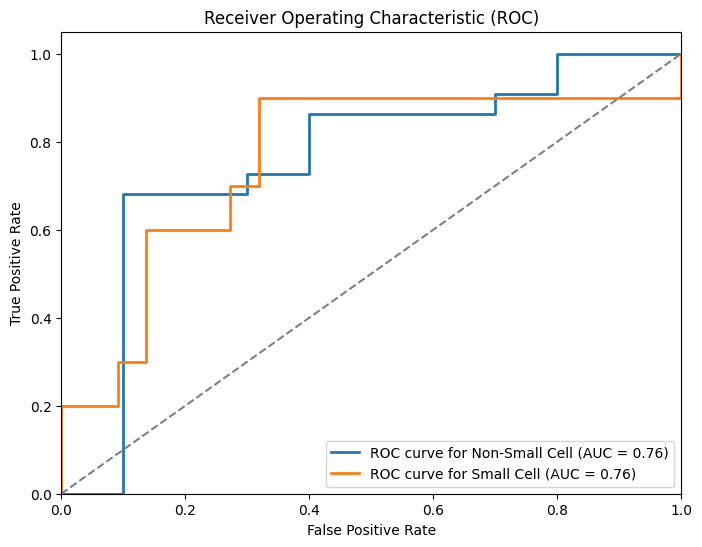

In [74]:
## auc

y_prob = svc_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## **RandomForest**

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [300, 500, 800],  # Number of trees in the forest
    'max_depth': [None, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4, 8],     # Minimum number of samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500, 800]},
             scoring='accuracy')

In [76]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

rf_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Mean Cross-Validation Score: 0.8138461538461538


In [77]:
y_pred = rf_best_model.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  3],
       [ 7,  3]])

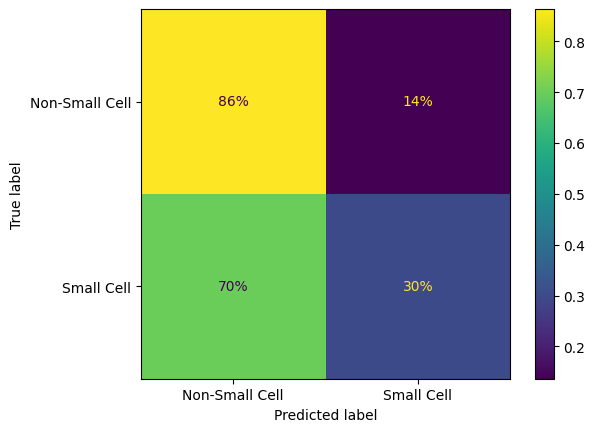

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [80]:
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.73      0.86      0.79        22
    Small Cell       0.50      0.30      0.37        10

      accuracy                           0.69        32
     macro avg       0.62      0.58      0.58        32
  weighted avg       0.66      0.69      0.66        32



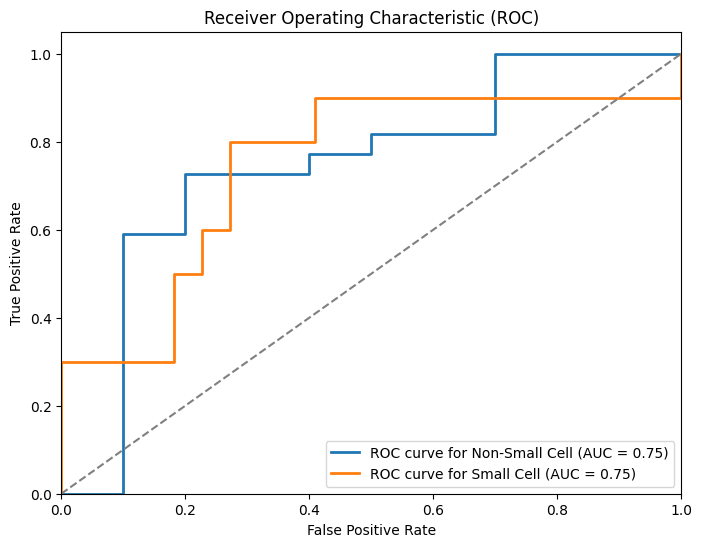

In [81]:
## auc

y_prob = rf_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

I chose three different approaches, Logistic Regression, RandomForest, and SVC.,the best approach seems to be Logistic Regression, with F1 score for Non-Small Cell and Small Cell 0.89 and 0.78, respectively.

## **Analysis of Predictive Features**

Next, I perform deeper analysis of feature that are important for segregating the two classes of Lung Cancer Cells. First we ask how many features accounts for 90% of the prediction using the RandomForest Model.

In [ ]:
importances = rf_best_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Cumulative sum of feature importances
cumulative_importances = np.cumsum(importances[sorted_indices])

# Find the number of features that account for 90% of prediction
num_features_90_percent = np.argmax(cumulative_importances >= 0.9) + 1

print("Of the 743 features, how many of these accounting for 90% of prediction:", num_features_90_percent)

Of the 743 features, how many of these accounting for 90% of prediction: 295


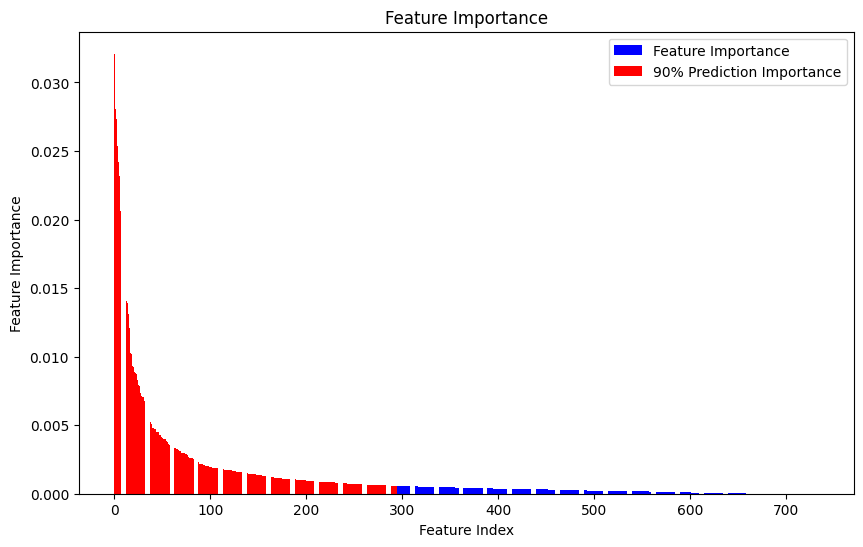

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center', color='blue', label='Feature Importance')

# Highlight the features that account for 90% of prediction
plt.bar(range(num_features_90_percent), importances[sorted_indices][:num_features_90_percent],
        align='center', color='red', label='90% Prediction Importance')

plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.legend()
plt.show()

In [ ]:
# rank the features by importance
feature_order_by_importance = importances[sorted_indices]
feature_order_by_importance[:10]

array([0.03209891, 0.02806761, 0.0273603 , 0.02536749, 0.02418479,
       0.02318093, 0.02066004, 0.01925152, 0.01735533, 0.01586958])

In [ ]:
# top 10 features that are important
X.columns[sorted_indices][:10]

Index(['MIMAT0000078', 'MIMAT0000772', 'MIMAT0000098', 'MIMAT0000100',
       'MIMAT0000084', 'MIMAT0000086', 'MIMAT0000279', 'MIMAT0000728',
       'MIMAT0002807', 'MIMAT0000428'],
      dtype='object')

In [ ]:
df = data[X.columns[sorted_indices][:10]]

In [ ]:
df['target'] = y

<ipython-input-187-41140dc06108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = y


In [ ]:
df.head(3)

,MIMAT0000078,MIMAT0000772,MIMAT0000098,MIMAT0000100,MIMAT0000084,MIMAT0000086,MIMAT0000279,MIMAT0000728,MIMAT0002807,MIMAT0000428,target
0,9.523483,9.837596,6.262471,6.130931,8.630558,8.090219,6.383013,16.641300,6.383013,6.978653,Small Cell
1,8.663416,9.447909,6.209064,7.271463,9.148095,11.304745,5.913608,14.604454,6.192391,6.496015,Small Cell
2,7.546431,9.184628,6.335569,6.084489,6.225159,8.155780,7.849311,14.351975,5.997518,8.420971,Small Cell


Next, I plotted of distribution of these miRNA in each of the cell lines and compare the expression of distribution of these in the Small Cell vs Non-Small Cell groups.

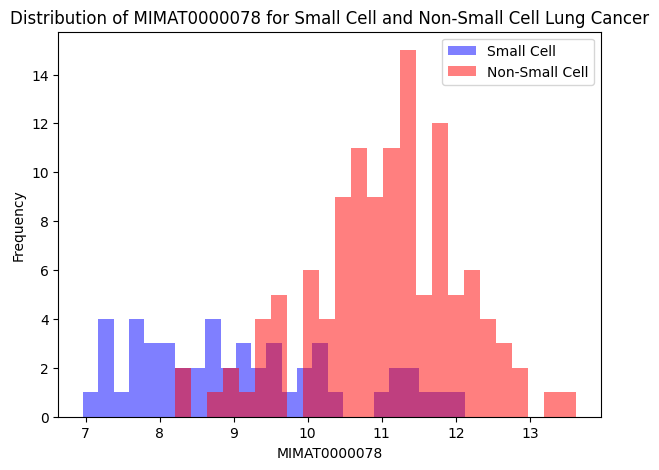

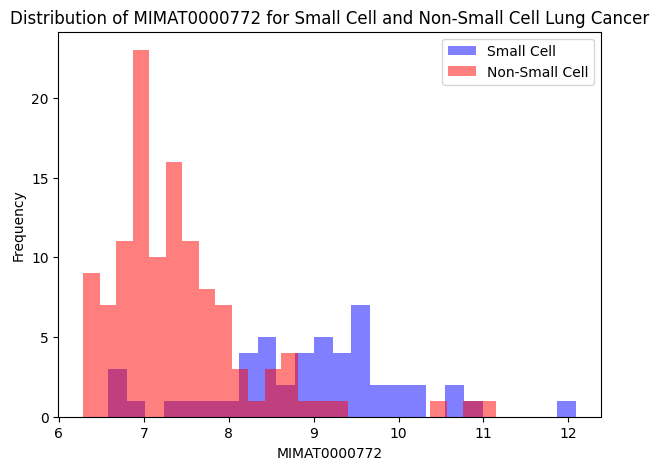

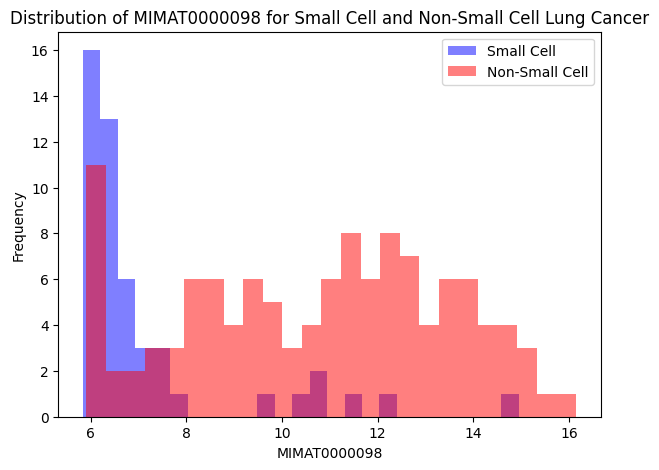

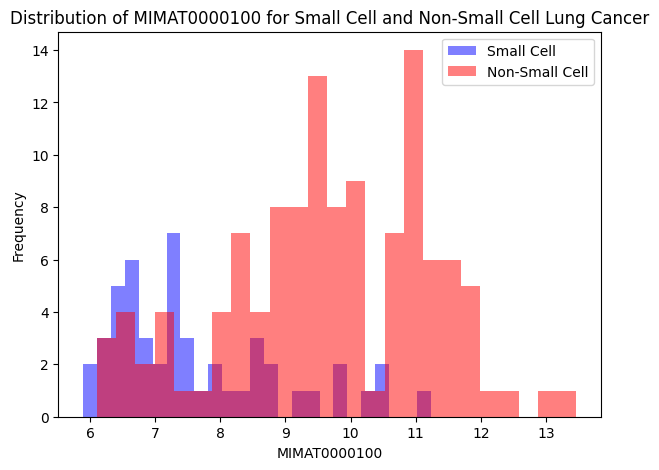

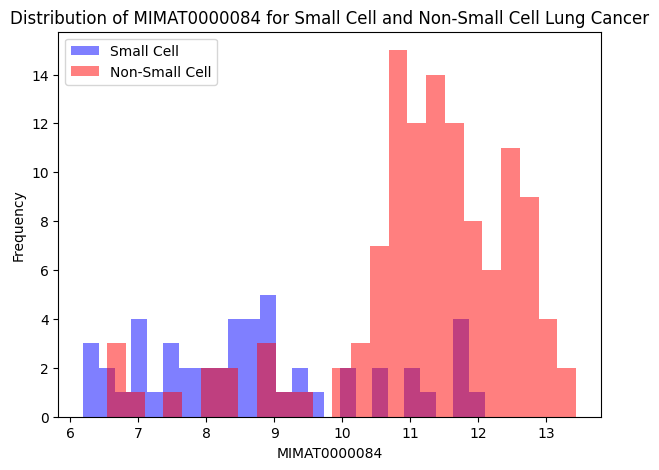

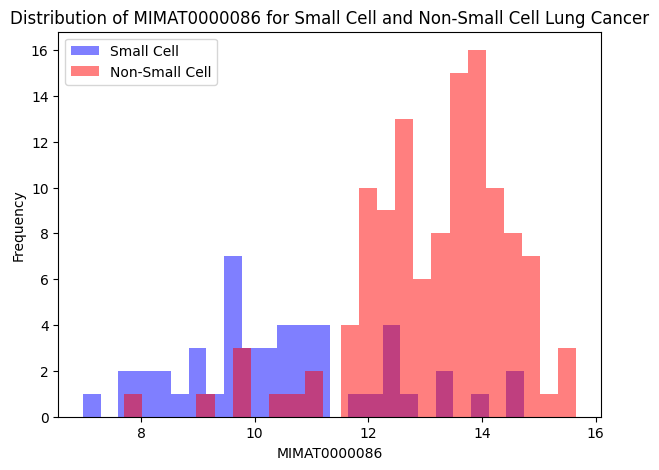

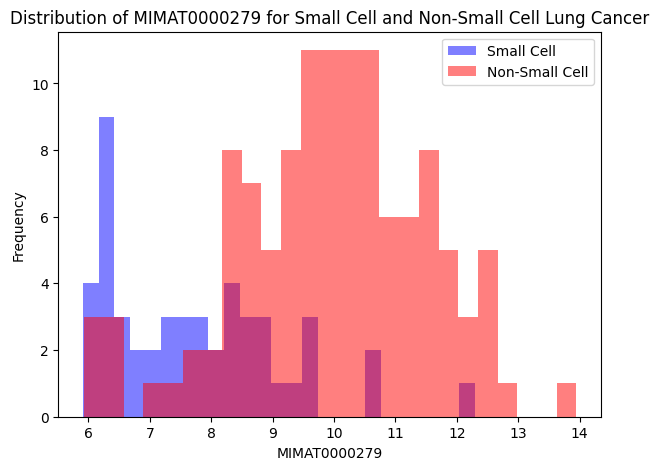

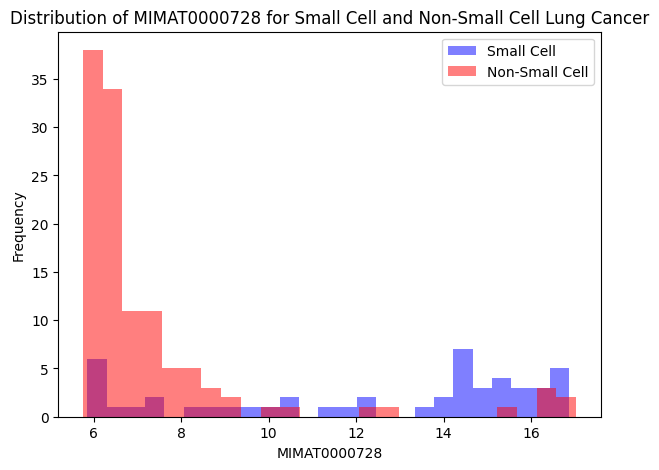

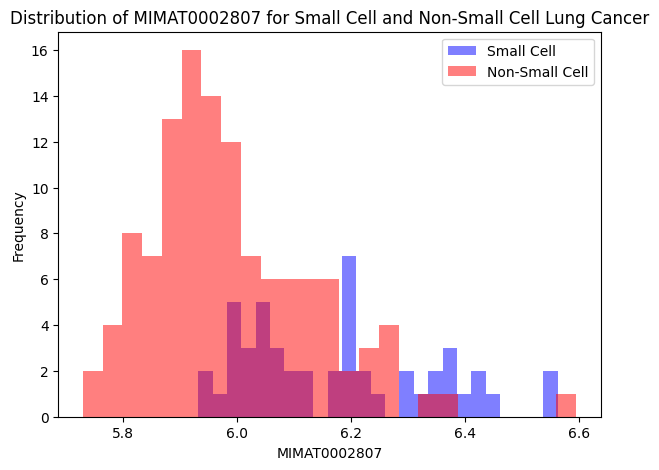

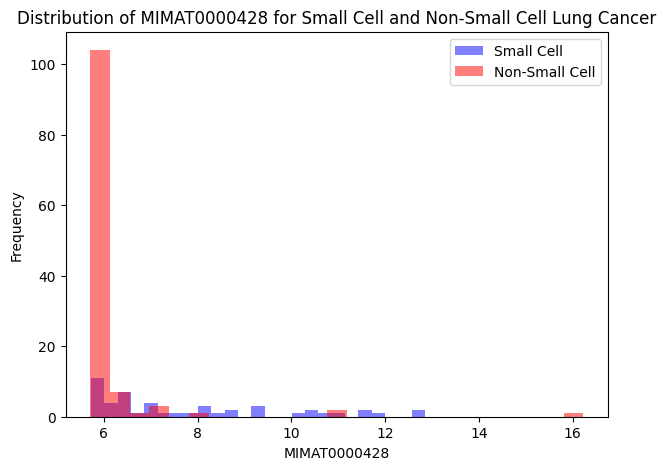

In [ ]:
class_0_data = df[df['target'] == "Small Cell"].drop(columns=['target'])
class_1_data = df[df['target'] == "Non-Small Cell"].drop(columns=['target'])

# Plot histograms for each feature comparing the two classes
for feature in df.columns[:-1]:  # Exclude the target column from iteration
    plt.figure(figsize=(7, 5))
    plt.hist(class_0_data[feature], bins=25, alpha=0.5, label='Small Cell', color='blue')
    plt.hist(class_1_data[feature], bins=25, alpha=0.5, label='Non-Small Cell', color='red')
    plt.title(f'Distribution of {feature} for Small Cell and Non-Small Cell Lung Cancer')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    print()

From miRBase (www.mirbase.org/), the corresponding miRNA for several of the miRNA Identifiier recovered above.

In [ ]:
miRNA_data = {
    'MIMAT0000078' : 'hsa-miR-23a-3p',
    'MIMAT0000772' : 'hsa-miR-345-5p',
    'MIMAT0000098' : 'hsa-miR-100-5p',
    'MIMAT0000100': 'hsa-miR-375-3p',
    'MIMAT0000084' : 'hsa-mir-27a',
    'MIMAT0000086' : 'hsa-miR-29a-3p',
    'MIMAT0000279' : 'hsa-miR-222-3p',
    'MIMAT0000728': 'hsa-miR-375-3p',
    'MIMAT0002807' : 'hsa-miR-29a-3p',
    'MIMAT0000428' : 'hsa-miR-135a-5p',
}

table = pd.DataFrame(list(miRNA_data.items()), columns=['miRNA Identifier', 'miRNA'])
table

,miRNA Identifier,miRNA
0,MIMAT0000078,hsa-miR-23a-3p
1,MIMAT0000772,hsa-miR-345-5p
2,MIMAT0000098,hsa-miR-100-5p
3,MIMAT0000100,hsa-miR-375-3p
4,MIMAT0000084,hsa-mir-27a
5,MIMAT0000086,hsa-miR-29a-3p
6,MIMAT0000279,hsa-miR-222-3p
7,MIMAT0000728,hsa-miR-375-3p
8,MIMAT0002807,hsa-miR-29a-3p
9,MIMAT0000428,hsa-miR-135a-5p


## **Conclusion**

This analysis reveals significant differences in miRNA expression profiles between Small Cell and Non-Small Cell Lung Cancer Cell lines. By identifying these distinct miRNA signatures, this contributes to understanding the molecular mechanisms underlying lung tumorigenesis. These findings highlight potential targets for further investigation and therapeutic interventions aimed at combating lung cancer progression.

### Addendum

I explore if neural network classification will perform better than the three approaches above.

In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train = y_train.apply(lambda x: 0 if x == "Non-Small Cell" else 1)
y_test = y_test.apply(lambda x: 0 if x == "Non-Small Cell" else 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(134, 734)

In [ ]:
model = Sequential()

model.add(Dense(units=743,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
5/5 [==============================] - 1s 64ms/step - loss: 0.7114 - accuracy: 0.5448 - val_loss: 0.5443 - val_accuracy: 0.7059
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6832 - accuracy: 0.6045 - val_loss: 0.5846 - val_accuracy: 0.7059
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6237 - accuracy: 0.6567 - val_loss: 0.5553 - val_accuracy: 0.7059
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6486 - accuracy: 0.6716 - val_loss: 0.5541 - val_accuracy: 0.8235
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6118 - accuracy: 0.6642 - val_loss: 0.4992 - val_accuracy: 0.8235
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 0.5578 - accuracy: 0.7090 - val_loss: 0.4590 - val_accuracy: 0.8235
Epoch 7/100
5/5 [==============================] - 0s 27ms/step - loss: 0.5812 - accuracy: 0.7239 - val_loss: 0.4311 - val_accuracy: 0.8235
Epoch 8/100
5/5 [===

<Axes: >

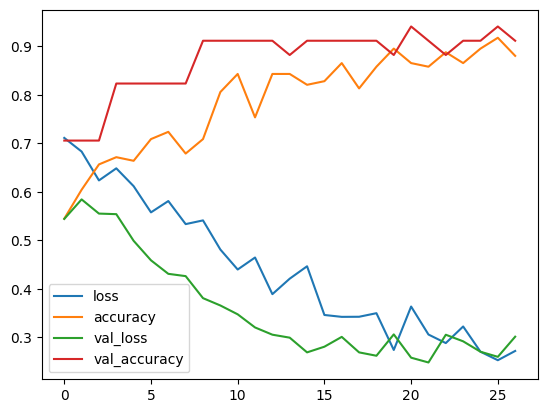

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.89      0.80      0.84        10

    accuracy                           0.91        34
   macro avg       0.90      0.88      0.89        34
weighted avg       0.91      0.91      0.91        34



Neural Network with the current configuration does not provide any improvement in classification performance.